In [82]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D 
from tensorflow.keras.datasets import cifar10

# 이미 훈련과 테스트가 분리된 데이터임
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [83]:
# 데이터의 크기 확인
# 28X28X1 = 흑백데이터다~ 
print("train",x_train.shape,y_train.shape) #(50000, 32, 32, 3) (50000, 1)
print("test",x_test.shape,y_test.shape) # (10000, 32, 32, 3) (10000, 1)



train (50000, 32, 32, 3) (50000, 1)
test (10000, 32, 32, 3) (10000, 1)


In [84]:
# y의 클래스 보기
a,b = np.unique(y_train,return_counts=1)
# print(np.unique(y_train,return_counts=1))
print(a)
print(b)

[0 1 2 3 4 5 6 7 8 9]
[5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]


In [85]:
# 크기변경
# x_train = x_train.reshape(50000, 32, 32, 3)
# x_test = x_test.reshape(50000, 32, 32, 3)

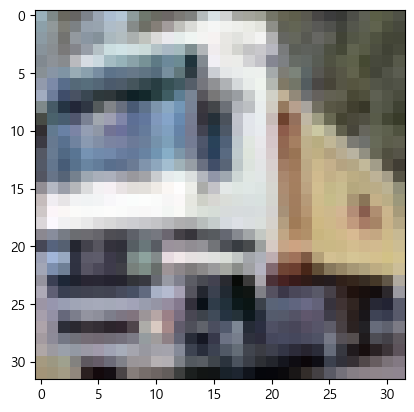

In [86]:
# 이미지 시각화
import matplotlib.pyplot as plt
plt.imshow(x_train[1])

In [87]:
# 모델
# 베이스모델불러오기
from tensorflow.keras.applications import efficientnet
def build_model(input_shape, n_classes):

    base_model = efficientnet.EfficientNetB0(input_shape=input_shape,
                                      weights="imagenet",
                                      include_top=False,
                                      classes=10)

    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

model = build_model(input_shape=(32, 32, 3), n_classes=10)
model.summary()

In [ ]:
# r = 0.2

# model = Sequential([
#     # 5X5 이미지 채널 1개 
#     # 필터 = output 노드수 
#     # 자르는 필터는 2X2 사이즈 
#     Conv2D(filters=128,kernel_size=(2,2),input_shape=(32,32,3),activation="relu",padding="same"),
#     MaxPooling2D(),
#     # 패딩값을 same 으로 적용하여 shape 가 유지
#     Conv2D(filters=64,kernel_size=(2,2),padding="same",activation="relu"),   
    
#     Dropout(r),
#     Conv2D(filters=32,kernel_size=(4,4),padding="valid",activation="relu"),   
#     # 32x32 를 4x4로 필터링하면 29x29 가 된다
#     # 32x32 - (n-1) 이 계산식임  
#     MaxPooling2D(),
#     Dropout(r),
#     Conv2D(filters=16,kernel_size=(4,4),padding="valid",activation="relu"),   
#     MaxPooling2D(),
#     Dropout(r),
#     # 완전통합층에서는 falt + Flatten(),
#     # Dense 의 인풋은 batch_size , input_dim
#     Flatten(),
#     Dense(32,activation="relu"),
#     Dense(10,activation="softmax")
# ])

# model.summary()

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["acc"])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

earlyStopping = EarlyStopping(monitor="val_loss",
                              mode="min",patience =10,
                              # True 면 좋았던 웨이트로 복원됨
                              # False 면 마지막 웨이트로 놔둠..
                              restore_best_weights=True,
                              verbose=1                              
                              )
# 모델체크포인트는 가장 낮은 val_loss 가 갱신 될 떄 마다 저장합니다.

mcp = ModelCheckpoint(
    monitor="val_loss",
    mode="auto",
    save_best_only=True,
    filepath= "cifar.h5",
    verbose=1 
)


hist = model.fit(
                x_train,
                y_train,
                epochs=100,
                batch_size=64,
                validation_split=0.2,
                verbose=1,
                callbacks = [earlyStopping,mcp],      
                )

Epoch 1/100
625/625 [==============================] - ETA: 0s - loss: 1.1605 - acc: 0.6132
Epoch 00001: val_loss improved from inf to 0.68960, saving model to cifar.h5


c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


625/625 [==============================] - 47s 66ms/step - loss: 1.1605 - acc: 0.6132 - val_loss: 0.6896 - val_acc: 0.7671
Epoch 2/100
625/625 [==============================] - ETA: 0s - loss: 0.6838 - acc: 0.7706
Epoch 00002: val_loss improved from 0.68960 to 0.57970, saving model to cifar.h5
625/625 [==============================] - 39s 63ms/step - loss: 0.6838 - acc: 0.7706 - val_loss: 0.5797 - val_acc: 0.8055
Epoch 3/100
625/625 [==============================] - ETA: 0s - loss: 0.5562 - acc: 0.8135
Epoch 00003: val_loss improved from 0.57970 to 0.57687, saving model to cifar.h5
625/625 [==============================] - 42s 67ms/step - loss: 0.5562 - acc: 0.8135 - val_loss: 0.5769 - val_acc: 0.8099
Epoch 4/100
625/625 [==============================] - ETA: 0s - loss: 0.4715 - acc: 0.8413
Epoch 00004: val_loss improved from 0.57687 to 0.54966, saving model to cifar.h5
625/625 [==============================] - 40s 63ms/step - loss: 0.4715 - acc: 0.8413 - val_loss: 0.5497 - val_a

In [ ]:
loss,acc = model.evaluate(x_test,y_test)
print("loss : ",loss)
print("acc : ",acc)


313/313 [==============================] - 6s 20ms/step - loss: 0.5809 - acc: 0.8161
loss :  0.5808914303779602
acc :  0.816100001335144


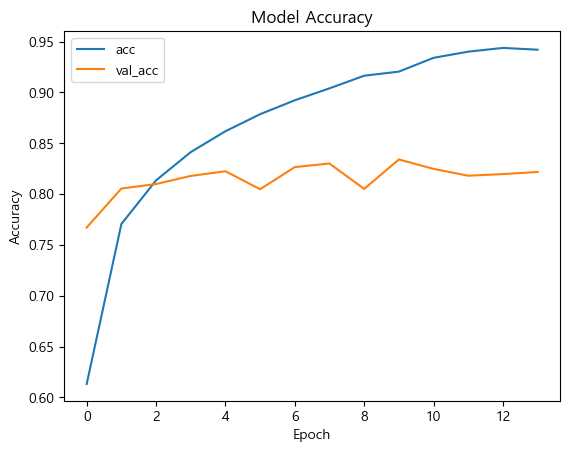

In [ ]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

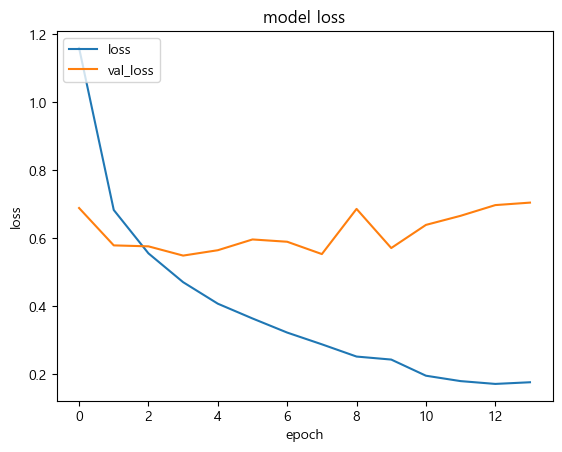

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()